In [1]:
#Import Packages 
from qiskit import Aer, QuantumCircuit, ClassicalRegister, QuantumRegister, IBMQ, execute
import csv
import numpy as np
import matplotlib.pyplot
from matplotlib.pyplot import *
from qiskit.tools.visualization import plot_histogram
from matplotlib.lines import Line2D

In [2]:
#Automate Output Spreadsheet Generation
class CSVWriter:

    def __init__(self, QuantumCircuit, backends, input_bits, error_op, shots, filename):
        self.qc = QuantumCircuit
        self.error_op = error_op
        self.input_bits = input_bits
        self.jobs = []
        self.filename = filename
        self.__init_jobs(backends, shots)

    class __job:

        def __init__(self, SpecificBackend, qc, shots):
            self.qc = qc
            self.shots = shots
            provider = IBMQ.get_provider()
            self.backendname = SpecificBackend
            self.backend = provider.get_backend(SpecificBackend)
            self.result, self.id = self.__run()

        def __run(self):
            job = execute(self.qc, backend = self.backend, shots = self.shots)
            return job.result(), job.job_id()

    def __id(self, job):
        return job.id

    def __machine(self, job):
        return job.backendname

    def __shots(self, job):
        return job.shots

    def __KeyVals(self, job):
        dic = job.result.data()['counts']
        keys, vals = zip(*dic.items())
        return keys, vals

    def __init_jobs(self, backends, shots):
        print('Initializing Jobs...')
        for backend in backends:
            print('Running qc on '+backend+' for '+str(shots)+' shots...')
            self.jobs.append(self.__job(backend, self.qc, shots))
            print('done.')

    def __generate_labels(self, job):
        keys, vals = self.__KeyVals(job)
        labels = [['Machine'], ['input bits'], ['error operator'], ['no. of shots'], ['job id']]
        for key in keys:
            labels.append([key])
        return labels

    def __generate_data(self, job, Ldat):
        keys, vals = self.__KeyVals(job)
        Ldat[0].append(self.__machine(job))
        Ldat[1].append(self.input_bits)
        Ldat[2].append(self.error_op)
        Ldat[3].append(self.__shots(job))
        Ldat[4].append(self.__id(job))
        for i in range(len(keys)):
            Ldat[5+i].append(vals[i])
        
    def generate_csv(self):
        filename = self.filename
        labels = self.__generate_labels(self.jobs[0])
        for job in self.jobs:
            self.__generate_data(job, labels)
        with open(filename, 'w') as csvfile:
            writer = csv.writer(csvfile)
            writer.writerows(labels)

In [ ]:
#Loading IBMQ Account
IBMQ.save_account('(INSERT USER IBM TOKEN HERE)', overwrite=True)
IBMQ.load_account()

In [4]:
# Next we establish a list of backends that we want to run on.  These must be strings.
backends = ['ibmq_santiago', 'ibmq_athens']

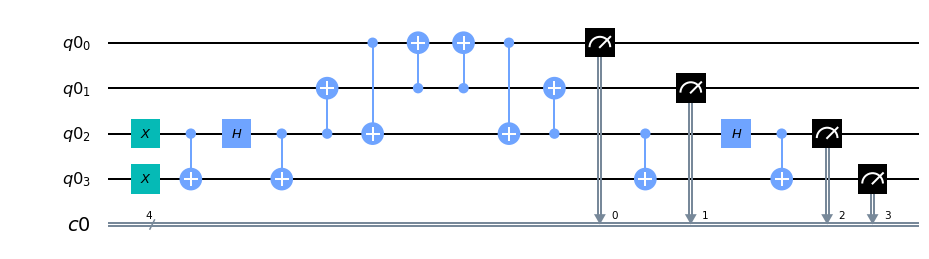

In [5]:
#Setup QECC Circuit with 
#Initial State |1100>
#Error Operator W=I

q = QuantumRegister(4)
c = ClassicalRegister(4)
qc = QuantumCircuit(q, c)


#set up initial state
qc.x(q[2])
qc.x(q[3])

# encode
qc.cx(q[2],q[3])
qc.h(q[2])
qc.cx(q[2],q[3])
qc.cx(q[2], q[1])
qc.cx(q[0], q[2])
qc.cx(q[1], q[0])

# error operators

# decode
qc.cx(q[1], q[0])
qc.cx(q[0], q[2])
qc.cx(q[2], q[1])
qc.cx(q[2],q[3])
qc.h(q[2])
qc.cx(q[2],q[3])

# Measure all qubits
qc.measure(q[0], c[0])
qc.measure(q[1], c[1])
qc.measure(q[2], c[2])
qc.measure(q[3], c[3])

#CircFig=qc.draw(output="latex",filename='4QubitQECC1000.png')
qc.draw()
qc.draw(output="mpl")

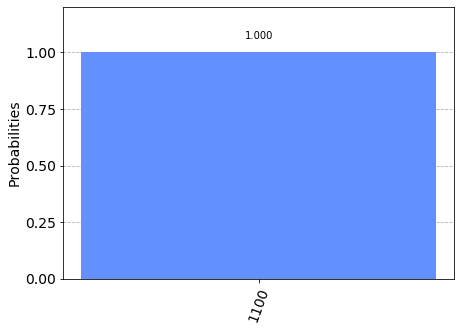

In [6]:
#Simulate
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, backend=simulator).result()
plot_histogram(result.get_counts(qc))

In [ ]:
#Running the results and writing the info on a csv file
A = CSVWriter(qc, backends, '1100', 'I', 2048, '4QubitQECC1100.csv')
A.generate_csv()

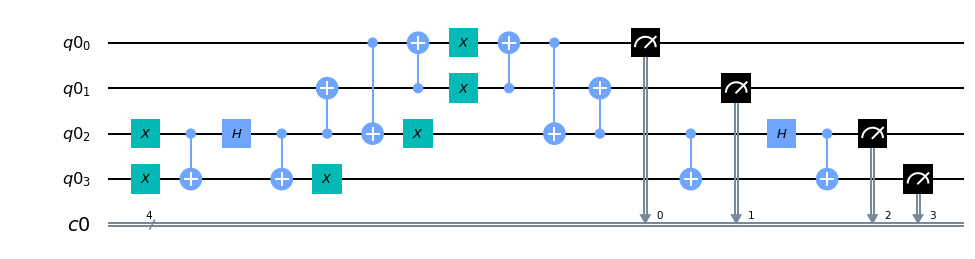

In [5]:
#Setup QECC Circuit with 
#Initial State |1100>
#Error Operator W=X

q1 = QuantumRegister(4)
c1 = ClassicalRegister(4)
qc1 = QuantumCircuit(q1, c1)


#Set up initial state
qc1.x(q1[2])
qc1.x(q1[3])

# encode
qc1.cx(q1[2],q1[3])
qc1.h(q1[2])
qc1.cx(q1[2],q1[3])
qc1.cx(q1[2], q1[1])
qc1.cx(q1[0], q1[2])
qc1.cx(q1[1], q1[0])

#error operators
qc1.x(q1)

# decode
qc1.cx(q1[1], q1[0])
qc1.cx(q1[0], q1[2])
qc1.cx(q1[2], q1[1])
qc1.cx(q1[2],q1[3])
qc1.h(q1[2])
qc1.cx(q1[2],q1[3])

# Measure all qubits
qc1.measure(q1[0], c1[0])
qc1.measure(q1[1], c1[1])
qc1.measure(q1[2], c1[2])
qc1.measure(q1[3], c1[3])

#CircFig=qc.draw(output="latex",filename='4QubitQECC1000.png')
qc1.draw()
qc1.draw(output="mpl")

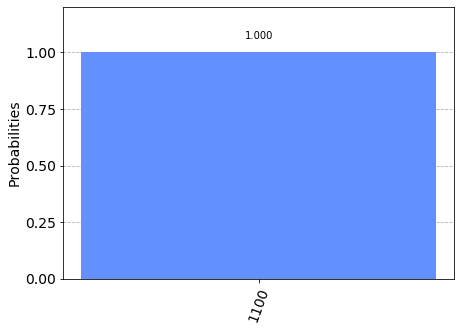

In [6]:
#Simulate
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc1, backend=simulator).result()
plot_histogram(result.get_counts(qc1))

In [ ]:
#Running the results and writing the info on a csv file
A1 = CSVWriter(qc1, backends, '1100', 'X', 2048, '4QubitQECC1100X.csv')
A1.generate_csv()

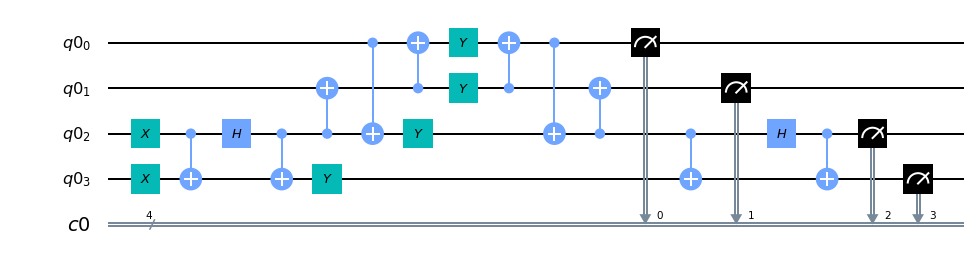

In [5]:
#Setup QECC Circuit with 
#Initial State |1100>
#Error Operator W=Y

q2 = QuantumRegister(4)
c2 = ClassicalRegister(4)
qc2 = QuantumCircuit(q2, c2)


#Set up initial state
qc2.x(q2[2])
qc2.x(q2[3])

# encode
qc2.cx(q2[2],q2[3])
qc2.h(q2[2])
qc2.cx(q2[2],q2[3])
qc2.cx(q2[2], q2[1])
qc2.cx(q2[0], q2[2])
qc2.cx(q2[1], q2[0])

#error operators
qc2.y(q2)

# decode
qc2.cx(q2[1], q2[0])
qc2.cx(q2[0], q2[2])
qc2.cx(q2[2], q2[1])
qc2.cx(q2[2],q2[3])
qc2.h(q2[2])
qc2.cx(q2[2],q2[3])

# Measure all qubits
qc2.measure(q2[0], c2[0])
qc2.measure(q2[1], c2[1])
qc2.measure(q2[2], c2[2])
qc2.measure(q2[3], c2[3])

#CircFig=qc.draw(output="latex",filename='4QubitQECC1000.png')
qc2.draw()
qc2.draw(output="mpl")

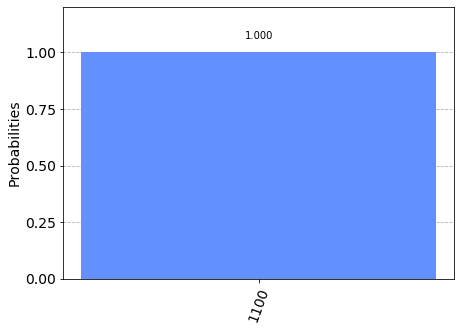

In [6]:
#Simulate
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc2, backend=simulator).result()
plot_histogram(result.get_counts(qc2))

In [ ]:
#Running the results and writing the info on a csv file
A2 = CSVWriter(qc2, backends, '1100', 'Y', 2048, '4QubitQECC1100Y.csv')
A2.generate_csv()

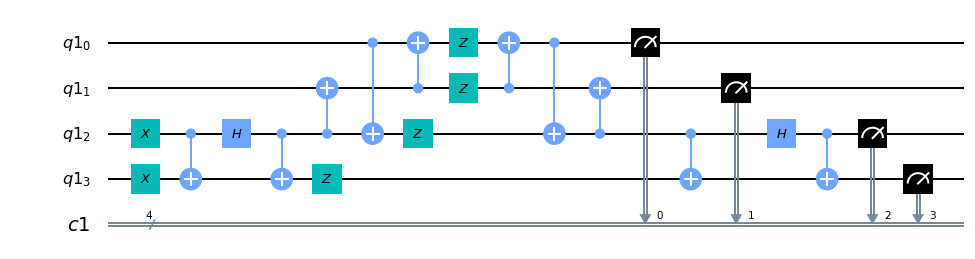

In [8]:
#Setup QECC Circuit with 
#Initial State |1100>
#Error Operator W=Z

q3 = QuantumRegister(4)
c3 = ClassicalRegister(4)
qc3 = QuantumCircuit(q3, c3)


#Set up initial state
qc3.x(q3[2])
qc3.x(q3[3])

# encode
qc3.cx(q3[2],q3[3])
qc3.h(q3[2])
qc3.cx(q3[2],q3[3])
qc3.cx(q3[2], q3[1])
qc3.cx(q3[0], q3[2])
qc3.cx(q3[1], q3[0])

#error operators
qc3.z(q3)

# decode
qc3.cx(q3[1], q3[0])
qc3.cx(q3[0], q3[2])
qc3.cx(q3[2], q3[1])
qc3.cx(q3[2],q3[3])
qc3.h(q3[2])
qc3.cx(q3[2],q3[3])

# Measure all qubits
qc3.measure(q3[0], c3[0])
qc3.measure(q3[1], c3[1])
qc3.measure(q3[2], c3[2])
qc3.measure(q3[3], c3[3])

#CircFig=qc.draw(output="latex",filename='4QubitQECC1000.png')
qc3.draw()
qc3.draw(output="mpl")

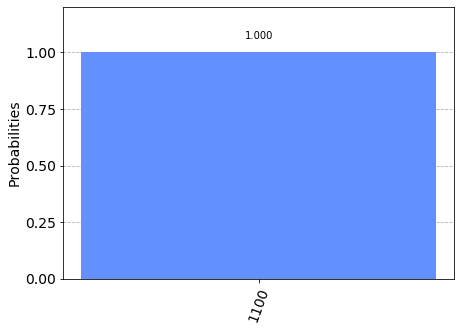

In [9]:
#Simulate
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc3, backend=simulator).result()
plot_histogram(result.get_counts(qc3))

In [ ]:
#Running the results and writing the info on a csv file
A3 = CSVWriter(qc3, backends, '1100', 'Z', 2048, '4QubitQECC1100Z.csv')
A3.generate_csv()

In [11]:
#PLOT OF RESULTS
#February 13, 2021
colors= ['black','dimgrey','grey','darkgrey']
legend=['III', 'XXX', 'YYY', 'ZZZ']
Legend_Lines = [Line2D([0], [0], color=colors[0], lw=4),
                Line2D([0], [0], color=colors[1], lw=4),
                Line2D([0], [0], color=colors[2], lw=4),
                Line2D([0], [0], color=colors[3], lw=4)]



N4_sa={'0000':    1, '0001':  0, '0010':  44, '0011':  0, '0100':  0, '0101':  1, '0110':   0, '0111':  0, '1000': 43, '1001':  2, '1010':  0, '1011':  0, '1100': 1917, '1101':  33, '1110':   6, '1111':  1}
X4_sa={'0000': 1261, '0001': 46, '0010':  34, '0011':  5, '0100': 51, '0101':  2, '0110':  41, '0111': 13, '1000': 82, '1001':  6, '1010': 33, '1011': 17, '1100':  415, '1101':  19, '1110':  22, '1111':  1}
Y4_sa={'0000':  577, '0001': 90, '0010': 118, '0011': 54, '0100': 61, '0101': 28, '0110':  21, '0111': 18, '1000': 70, '1001': 26, '1010': 23, '1011': 17, '1100':  688, '1101': 100, '1110': 103, '1111': 54}
Z4_sa={'0000':  819, '0001': 47, '0010':  67, '0011':  9, '0100': 71, '0101': 11, '0110':  25, '0111': 31, '1000': 54, '1001': 11, '1010': 36, '1011': 43, '1100':  681, '1101':  59, '1110':  69, '1111': 15}

q4_sa=plot_histogram([N4_sa,X4_sa,Y4_sa,Z4_sa], color=colors, title='initial state 0100  run on ibmq_santiago',figsize=(25,15))
yax_sa = q4_sa.axes[0]
yax_sa.set_ylim(0,1)
ax_sa = q4_sa.gca()
q4_sa.legend(Legend_Lines, legend, bbox_to_anchor=(0.95, 0.95), bbox_transform=ax_sa.transAxes)
q4_sa.savefig('Santiago1100.png')


N4_at={'0000':  71, '0001':  6, '0010': 14, '0011': 12, '0100': 114, '0101': 14, '0110':  14, '0111': 13, '1000': 93, '1001': 13, '1010': 15, '1011':  8, '1100': 1517, '1101': 89, '1110': 37, '1111': 18}
X4_at={'0000': 169, '0001': 14, '0010': 39, '0011': 12, '0100': 105, '0101':  3, '0110':  30, '0111':  8, '1000': 81, '1001':  3, '1010': 45, '1011': 11, '1100': 1412, '1101': 25, '1110': 69, '1111': 22}
Y4_at={'0000':  82, '0001': 15, '0010': 16, '0011': 13, '0100': 105, '0101':  6, '0110':  25, '0111': 13, '1000': 97, '1001':  7, '1010': 23, '1011':  8, '1100': 1535, '1101': 30, '1110': 53, '1111': 20}
Z4_at={'0000': 157, '0001': 12, '0010': 31, '0011':  9, '0100': 100, '0101': 10, '0110':  22, '0111': 13, '1000': 90, '1001':  5, '1010': 29, '1011': 12, '1100': 1445, '1101': 41, '1110': 52, '1111': 20}

q4_at=plot_histogram([N4_at,X4_at,Y4_at,Z4_at], color=colors, title='initial state 0100 run on ibmq_athens',figsize=(50,20))
yax_at = q4_at.axes[0]
yax_at.set_ylim(0,1)
ax_at = q4_at.gca()
q4_at.legend(Legend_Lines, legend, bbox_to_anchor=(0.95, 0.95), bbox_transform=ax_at.transAxes)
q4_at.savefig('Athens1100.png')
